<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/EDA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

## Iris Flower Dataset

Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]

- A simple dataset to learn the basics of EDA
- 3 flowers of Iris species. [see images on wikipedia link above]
- 1936 by Ronald Fisher.
- Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris=pd.read_csv("/content/sample_data/iris.csv")

In [3]:
# column names in our dataset
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# no. of data points for each class
# no. of flower for each species
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

# 2-D Scatter Plot

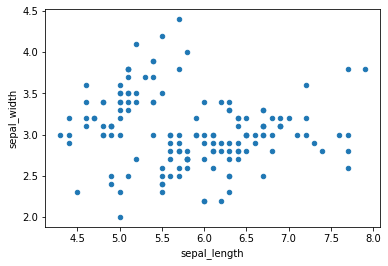

In [6]:
iris.plot('sepal_length','sepal_width',kind='scatter')
plt.show()

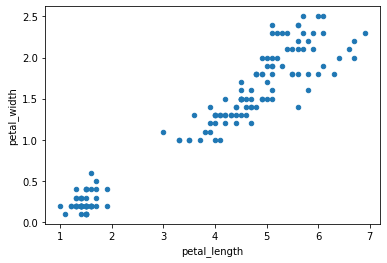

In [7]:
iris.plot('petal_length','petal_width',kind='scatter')
plt.show()

In [8]:
iris_setosa = iris.loc[iris["species"] == "setosa"]
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]

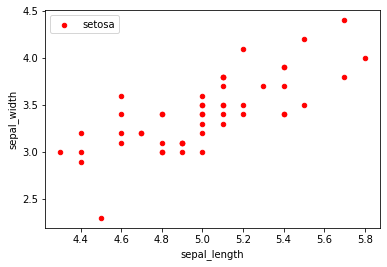

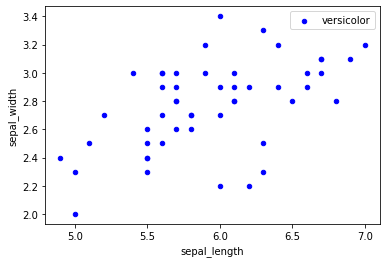

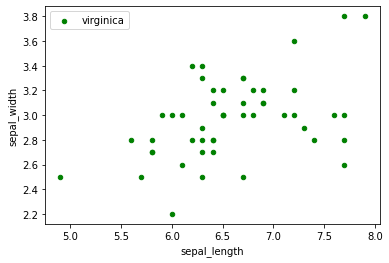

In [9]:
iris_setosa.plot(x="sepal_length", y="sepal_width", kind="scatter", label='setosa',color='r')
iris_versicolor.plot(x="sepal_length",y="sepal_width",kind="scatter", label='versicolor',color='b')
iris_virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", label='virginica', color='g')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


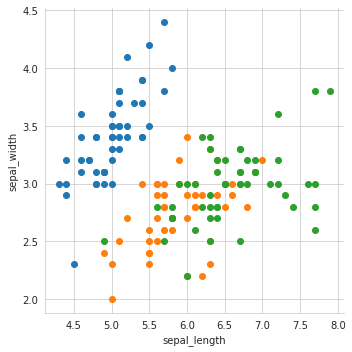

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue='species',size=5).map(plt.scatter,'sepal_length','sepal_width')
plt.show()

### Observations:
     1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
     2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

# Pair-Plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


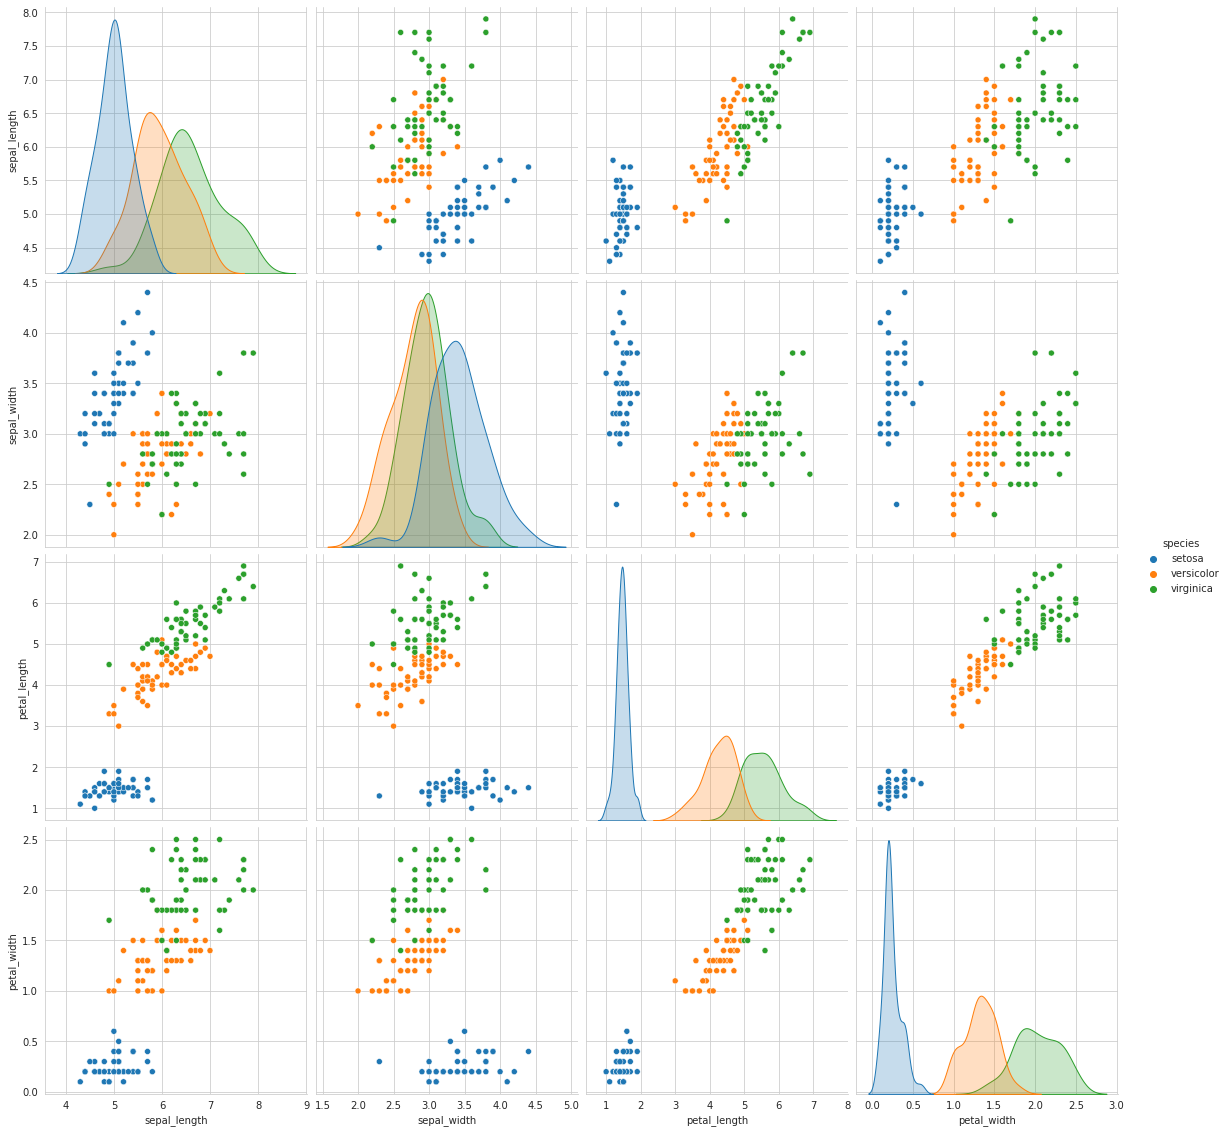

In [11]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='species',size=4)

### Observations:
     1. petal_length and petal_width are the most useful features to identify various flower types.
     2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly           seperable).
     3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# Histogram, PDF and CDF

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

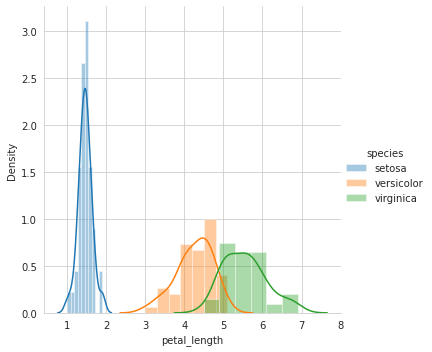

In [12]:
sns.FacetGrid(iris,hue='species',size=5).map(sns.distplot,"petal_length").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

AttributeError: ignored

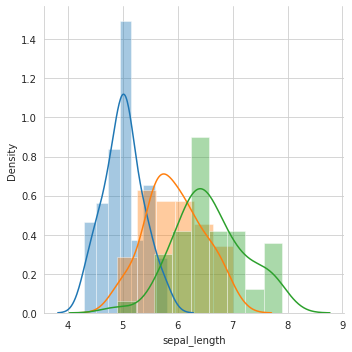

In [14]:
sns.FacetGrid(iris,hue='species',size=5).map(sns.distplot,'sepal_length').add_length()

In [15]:
import numpy as np

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


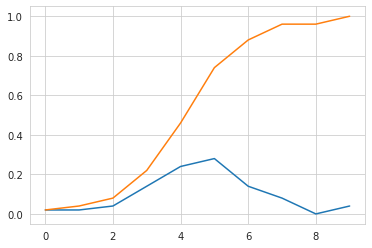

In [16]:
counts,x=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)

cdf=np.cumsum(pdf)
plt.plot(pdf)
plt.plot(cdf)
plt.show()

# Mean, Variance and Standard Deviation

In [17]:
print('Means:')
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))

print('\nstandard deviation:')
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))
print(np.std(iris_virginica["petal_length"]))

Means:
1.464
4.26
5.552

standard deviation:
0.17176728442867115
0.4651881339845204
0.5463478745268441


### Obsevations:
     MEAN:
     51st flower length is added to our data and it is wrong i.e huge value is inserted in our case its 50, but actual length        will be 1-2 so the mean is changed drastically, so following only mean is not feasible, similarly std also

# Median, Percentile, Quantile, IQR, MAD

In [18]:
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Observations:
     MEDIAN:
     Even after Adding Outlier the result is almost same.because if there are more than 50% of outliers then result will be          useless.So its better than mean and std.

# Box plot and Whiskers

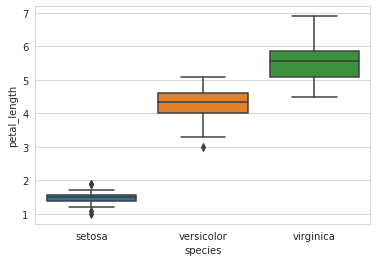

In [19]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.


#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below do not correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# Violin plots

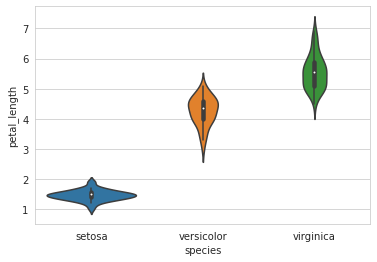

In [20]:
# A violin plot combines the benefits of the previous two plots and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# Multivariate probability density and contour plot

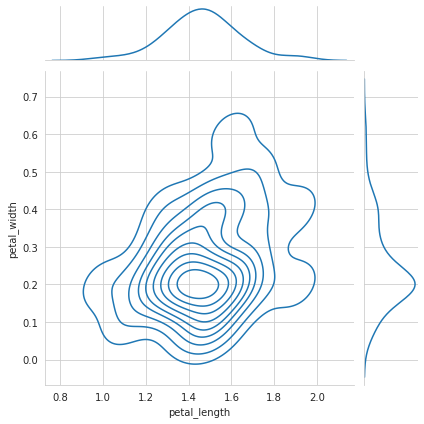

In [21]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde")
plt.show()

### Observations:
     In this 2d plot Dark layer indicates more points and light layers or hills is called less points.
     These light to dark lines is called contours. This graph is called Contours probability density plot.

# Summarizing EDA

## UniVarient Analysis
    PDF/Histograms
    CDF
    Box Plot
    Violin Plot
    
## BiVarient Analysis:
    Scatter Plot
    Pair Plot
    
## MultiVariant Analysis:
    We can use 3D plot.